In [121]:
import time
import re
import datetime as pydt
import pandas as pd
%matplotlib inline

In [122]:
def parse_reset_time(line):
    line = line.strip()
    line = line.split("RESET:TIME: ", 1)[1]
    #The method split() returns a list of all the words in the string"line" 
    # -using 1st arg as the separator, and 2nd arg to limit the number of splits
    
    st = time.strptime(line, "%Y-%m-%d-%H-%M-%S") #returns <type 'time.struct_time'>
    #The method strptime() parses a string representing a time according to a format.
    
    return time.mktime(st) #returns <type 'float'> (unix time)
    #The method mktime() is the inverse function of localtime(). 
    # -Its argument is the struct_time or full 9-tuple and it returns a floating point number, for compatibility with time().

In [123]:
def parse_time(s, fmt):
    """Parses a human readable duration string into milliseconds.
    Takes a human readable duration string like '1d2h3m4s5ms' and returns
    the equivalent in milliseconds.
    Args:
    -s: Duration string
    -fmt: A re object to parse the string
    Returns:
    -A number indicating the duration in milliseconds.
    """
    if s == "0": return 0.0

    p = re.compile(fmt)
    match = p.search(s)
    try:
        d = match.groupdict()
    except IndexError:
        return -1.0

    ret = 0.0
    if d["day"]: ret += float(d["day"])*60*60*24
    if d["hrs"]: ret += float(d["hrs"])*60*60
    if d["min"]: ret += float(d["min"])*60
    if d["sec"]: ret += float(d["sec"])
    if d["ms"]: ret += float(d["ms"])/1000
    return ret

In [124]:
file = open('batterystats.txt', 'r')
#print file.read()

In [125]:
filename = 'batterystats.txt'

with open(filename) as file_object: 
    lines = file_object.readlines() #returns list of strings 
    
battery_list = [] 
ts_list = []
dt_list = []
prev_battery_level = -1

for i, line in enumerate(lines): 
    line.rstrip()
    if len(line.strip()) == 0: #empty line b/t battery data and "Per-PID Stats:"
        break
    
    if "RESET:TIME: " in line:
        data_start_time = parse_reset_time(line)
    elif (i!=0) and (not "Details:" in line) and (not "/proc/stat" in line):
    #ignore trivial rows: first row & "Details:" rows & "/proc/stat=17080" rows
        data = line.split()
        line_time = data[0] #duration like '1d2h3m4s5ms' (string)
        line_battery_level = int(data[2]) #battery percentage (int)
       
        fmt = (r"\+((?P<day>\d+)d)?((?P<hrs>\d+)h)?((?P<min>\d+)m)?"
           r"((?P<sec>\d+)s)?((?P<ms>\d+)ms)?$")
        time_delta_s = parse_time(line_time, fmt) #duration in seconds (float)
        ts = data_start_time + time_delta_s #unix time (float)       
        local_time = pydt.datetime.fromtimestamp(ts) #local time (datetime)
        
        battery_list.append(line_battery_level)
        ts_list.append(ts)
        dt_list.append(local_time)
        
        if line_battery_level != prev_battery_level:
            print str(local_time) + " " + str(line_battery_level) + " "+ str(type(line_battery_level))
        
        prev_battery_level = line_battery_level
        

2016-06-25 00:03:50 100 <type 'int'>
2016-06-25 01:53:51.453000 99 <type 'int'>
2016-06-25 04:33:51.445000 98 <type 'int'>
2016-06-25 07:13:50.565000 97 <type 'int'>
2016-06-25 09:53:51.641000 96 <type 'int'>
2016-06-25 12:43:51.703000 95 <type 'int'>
2016-06-25 15:13:51.740000 94 <type 'int'>
2016-06-25 17:43:50.815000 93 <type 'int'>
2016-06-25 18:03:51.813000 92 <type 'int'>
2016-06-25 18:23:50.807000 91 <type 'int'>
2016-06-25 18:43:50.810000 90 <type 'int'>
2016-06-25 19:03:51.813000 89 <type 'int'>
2016-06-25 19:23:50.848000 88 <type 'int'>
2016-06-25 19:43:50.828000 87 <type 'int'>
2016-06-25 20:13:50.776000 86 <type 'int'>
2016-06-25 23:06:34.649000 85 <type 'int'>


In [126]:
df = pd.DataFrame(data={'metadata_write_ts': ts_list, 'local_dt': dt_list, 'battery_level_pct': battery_list})
df

battery_level_pct                local_dt  metadata_write_ts
0                   100 2016-06-25 00:03:50.000       1.466838e+09
1                   100 2016-06-25 00:03:50.000       1.466838e+09
2                   100 2016-06-25 00:03:50.000       1.466838e+09
3                   100 2016-06-25 00:03:52.944       1.466838e+09
4                   100 2016-06-25 00:03:53.975       1.466838e+09
5                   100 2016-06-25 00:04:00.781       1.466838e+09
6                   100 2016-06-25 00:04:02.900       1.466838e+09
7                   100 2016-06-25 00:04:03.354       1.466838e+09
8                   100 2016-06-25 00:04:03.356       1.466838e+09
9                   100 2016-06-25 00:04:03.661       1.466838e+09
10                  100 2016-06-25 00:04:03.707       1.466838e+09
11                  100 2016-06-25 00:04:03.824       1.466838e+09
12                  100 2016-06-25 00:04:03.855       1.466838e+09
13                  100 2016-06-25 00:04:03.867       1.466838e+09
14                  100 2016-06-25 00:04:03.870       1.466838e+09
15                  100 2016-06-25 00:04:03.873       1.466838e+09
16                  100 2016-06-25 00:04:03.880       1.466838e+09
17                  100 2016-06-25 00:04:04.931       1.466838e+09
18                  100 2016-06-25 00:07:15.492       1.466838e+09
19                  100 2016-06-25 00:07:15.682       1.466838e+09
20                  100 2016-06-25 00:07:26.378       1.466838e+09
21                  100 2016-06-25 00:07:26.514       1.466838e+09
22                  100 2016-06-25 00:08:05.429       1.466838e+09
23                  100 2016-06-25 00:08:05.585       1.466838e+09
24                  100 2016-06-25 00:08:46.031       1.466839e+09
25                  100 2016-06-25 00:08:47.905       1.466839e+09
26                  100 2016-06-25 00:09:29.382       1.466839e+09
27                  100 2016-06-25 00:09:29.515       1.466839e+09
28                  100 2016-06-25 00:09:30.472       1.466839e+09
29                  100 2016-06-25 00:09:30.551       1.466839e+09
...                 ...                     ...                ...
1822                 85 2016-06-26 00:36:55.771       1.466927e+09
1823                 85 2016-06-26 00:36:58.350       1.466927e+09
1824                 85 2016-06-26 00:37:02.404       1.466927e+09
1825                 85 2016-06-26 00:37:04.569       1.466927e+09
1826                 85 2016-06-26 00:37:06.728       1.466927e+09
1827                 85 2016-06-26 00:37:06.728       1.466927e+09
1828                 85 2016-06-26 00:37:10.500       1.466927e+09
1829                 85 2016-06-26 00:37:10.500       1.466927e+09
1830                 85 2016-06-26 00:37:12.413       1.466927e+09
1831                 85 2016-06-26 00:37:13.490       1.466927e+09
1832                 85 2016-06-26 00:37:14.205       1.466927e+09
1833                 85 2016-06-26 00:37:14.379       1.466927e+09
1834                 85 2016-06-26 00:37:14.733       1.466927e+09
1835                 85 2016-06-26 00:37:15.354       1.466927e+09
1836                 85 2016-06-26 00:37:15.448       1.466927e+09
1837                 85 2016-06-26 00:37:16.734       1.466927e+09
1838                 85 2016-06-26 00:37:18.725       1.466927e+09
1839                 85 2016-06-26 00:37:38.715       1.466927e+09
1840                 85 2016-06-26 00:37:45.241       1.466927e+09
1841                 85 2016-06-26 00:37:45.715       1.466927e+09
1842                 85 2016-06-26 00:37:45.753       1.466927e+09
1843                 85 2016-06-26 00:37:45.909       1.466927e+09
1844                 85 2016-06-26 00:37:45.933       1.466927e+09
1845                 85 2016-06-26 00:37:45.938       1.466927e+09
1846                 85 2016-06-26 00:37:45.939       1.466927e+09
1847                 85 2016-06-26 00:37:45.941       1.466927e+09
1848                 85 2016-06-26 00:37:45.949       1.466927e+09
1849                 85 2016-06-26 00:37:45.960      

In [127]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852 entries, 0 to 1851
Data columns (total 3 columns):
battery_level_pct    1852 non-null int64
local_dt             1852 non-null datetime64[ns]
metadata_write_ts    1852 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 43.5 KB


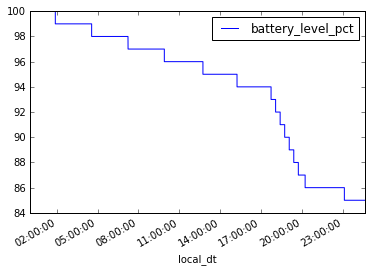

In [128]:
df.plot(x='local_dt', y='battery_level_pct')